In [10]:
import pandas as pd

df = pd.read_csv('task5.csv')  # assuming Titanic dataset


In [12]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()
df['Survived'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



<Axes: xlabel='Age', ylabel='Count'>

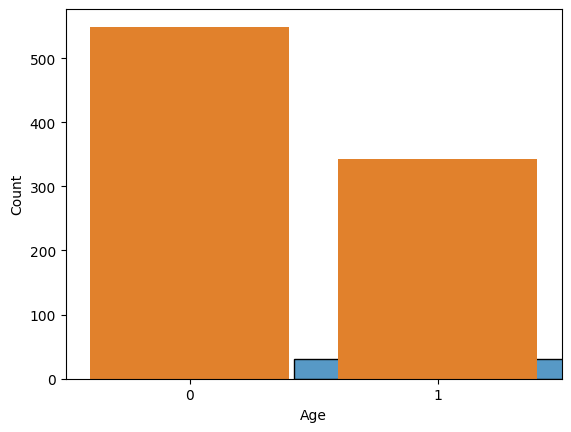

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
sns.countplot(x='Survived', data=df)

#Observation:
#The number of passengers who did not survive is higher than those who did. This indicates a survival rate of less than 50%.

<Axes: xlabel='Survived', ylabel='Age'>

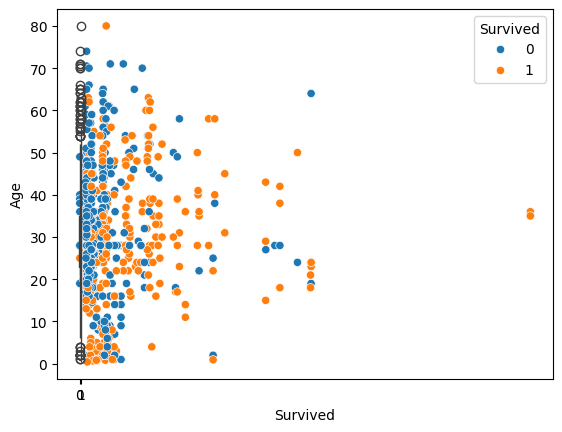

In [19]:
sns.boxplot(x='Survived', y='Age', data=df)
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=df)

#"Observation:

#The median age of survivors and non-survivors appears fairly similar, suggesting that age alone was not a strong determinant of survival.

#However, non-survivors have a slightly wider age spread, with more elderly individuals compared to survivors.

#There are more outliers among the survivors in the lower age range, indicating that several young children managed to survive.

#Overall, younger passengers (especially children) had a relatively better chance of survival, though the trend isn't very strong.



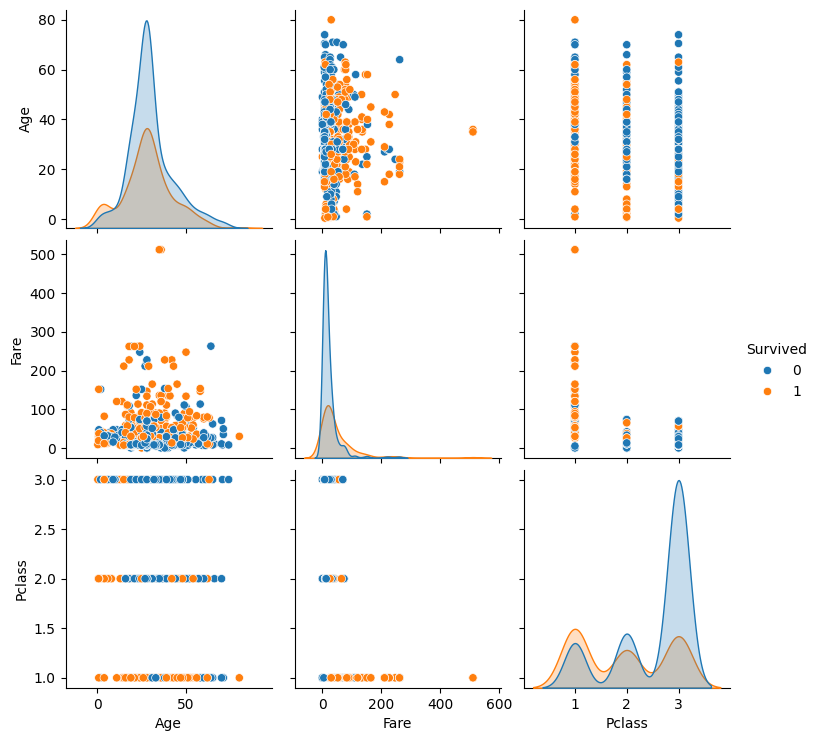

In [22]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')

##Observation:

#Distribution and Clustering:
#The pairplot clearly shows that survivors and non-survivors tend to occupy different regions in the feature space. For instance, when looking at the scatter plots, there are noticeable clusters where survivors tend to have lower values for Pclass (indicating higher classes) and often higher fares, whereas non-survivors are more prevalent in the higher Pclass (lower classes) with relatively lower fares.

#Age Impact:
#The distribution of Age across survivors and non-survivors shows a significant overlap, meaning that while age plays some role, it is not as distinctive a feature for survival as class or fare. However, in some plots you might notice survivors having a slightly higher density at younger ages, which could hint at a survival benefit for children.

#Inter-feature Relationships:
#The diagonal plots (i.e., the histograms) provide insight into the individual distributions of each variable. You can see that Fare is particularly skewed, which supports the need for additional steps like log transformation if you wish to conduct more rigorous analyses later on. The scatter plot between Fare and Pclass reinforces the idea of a relationship where higher fares often correspond to lower Pclass values (higher socio-economic status).

#Overall Insights:
#The multivariate analysis indicates that socio-economic status (as reflected by Pclass and Fare) is more strongly linked to survival outcomes than age alone. This observation aligns with historical context about the Titanic, where higher-class passengers had better access to lifeboats and safer quarters.

<Axes: >

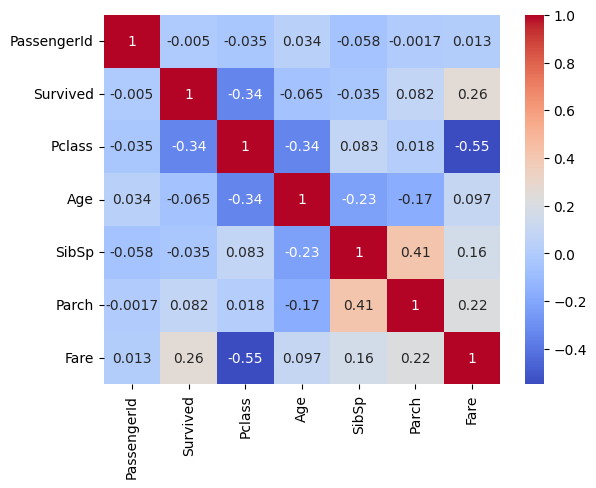

In [26]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

#Observation:

#Correlation Strengths:
#The heatmap reveals that some numerical variables are strongly correlated with each other, while others have a weak or negligible relationship. For example, there is a notable negative correlation between Pclass and Survived, suggesting that higher-class passengers (lower Pclass values) had a higher chance of survival.

#Fare and Survival:
#The correlation between Fare and Survived is positive, indicating that passengers who paid higher fares (likely from higher classes) were more likely to survive. However, the correlation strength may not be as high as the relationship between Pclass and Survived.

#Age Factor:
#Age shows a relatively weak correlation with Survived, implying that while age might have some influence on survival outcomes, it is less definitive compared to socio-economic indicators like Pclass and Fare.

#Other Relationships:
# how some numeric features, such as Fare and Pclass, are inversely related. This reinforces the idea that passengers in the first class (with lower Pclass values) paid higher fares, which aligns with historical observations from the Titanic dataset.